## ROC, PE/RC curve를 그려보며 confusion matrix 이해하기

### 목표 
1. confusion matrix를 어떻게 시각화 하는지 이해하자.
2. ROC,PE/RE curve를 그려보고 드러나지 않는 내용을 파악하자

### 구성
서론
 
* Roc/ PE/RE curve 그려서 관심 환기하기

본론
* confusion matrix를 사용하는 이유
    * accuracy 만으로는 모델의 성능을 파악할 수 없다.
        * 왼손잡이용 가위를 만드는 회사, 95%의 정확도가 중요할까? 
    * confusion matrix는 다양한 이해관계의 산물이다.
        * 범인 추정하기를 여기에 넣을까?   
        * Precision & Recall trade off        
        * 회사별로 필요한게 다양하다.
        * ds for business 다시 읽어보자  
        * confusion matrix를 보면 어디르 어떻게 줄여야할지 세부적인 계획을 세울 수 있다.

* 그래프 해석하기
    * ROC curve
    * PE/RC curve

codes 


titanic 토막글로 불러오기

------------------------



## ROC와 PE/RC curve 그려보며 confusion matrix 이해하기

### ROC Curve와 PE/RC Curve 
이번에 그릴 그래프는 confusion matrix에 기반해 많이 들어봤겠지만 confusion matrix는 classification 모델의 성능을 비교할때 사용해 그중에서도 대표적으로 ROC Curve나 PE/RE Curve를 활용하지
두 그래프는 confusion matrix에서 모델 성능과 관련된 부분을 그린거라 confusion matrix를 이해하고 있는 사람들에게는 잘 활용돼 하지만 이게 단점이기도 해 직관적으로 이해되기에는 confusion matrix를 잘알아야 하고 용어도 잘 알아야해  근데 우리가 상대해야할 사람은 data를 잘 알고 있지 못하는 사람들이잖아. 그래서 이를 직관적으로 이해할수 있도록 약간 변형을 가한 그래프도 있어. 이 주제는 현재 페이지에 벗어나니까 다음에 다뤄보도록 할게

이 글의 목적은 궁극적인 목적은 단순해. ROC curve와 PE/RC Curve를 해석하는 방법을 배우고 직접 그려보면서 Confusion matrix 개념을 단단히 하는 것이지. 만약 Confuion Matrix와 관련 용어에 대해 익숙하다고 생각하는 사람 있다면 이 글을 읽기 전 2시간 정도 본인이 직접 그려보는 것을 추천해. 우리의 주된 목적은 Confusion matrix를 이해하는 것이지만 그래프를 그리려면 Sklearn과 matplotlib, seaborn과 같은 visualization tool을 잘 다뤄야 하거든. 그래서 직접 구현한 code별로 알았으면 좋겠거나 설명이 필요하다고 생각되는 부분에 있어서는 설명을 하고 넘어가려고 해. 

마지막으로 이 글을 단순히 개념을 파악하는데 있다고 생각하지 않았으면 좋겠어. 개념을 이해하는 것 뿐만 아니라 직접 모델도 만들어보고 visualization tool에도 익숙해지는 과정인거야. 그려려면 스스로 그래프를 그려보던 글을 읽으면서 하나씩 따라하며 그려보던 직접 해봐야해. 가장 빠른길이니까 믿고 따라와.


<img src='data/main_1.png' style='width : 90px; height : 50px; display : block; margin : 0 auto'>


###  Confusion matrix 기본 개념

confusion matrix 공부를 하자마자 바로 이 글을 읽는 사람들은 거의 없겠지? 기억이 날듯말듯 할텐데 복습한다는 생각으로 간단히 공부해보자. confusion matrix를 한글로 배우는 사람이 있는지는 모르겠는데 나는 한국어로 된 용어는 잘 모르니까 영어로 쓸게. 그런 사람들은 영어로 된 용어에 익숙해진다고 생각하고 봐

<img src='data/main_1.png' style='width : 90px; height : 50px; display : block; margin : 0 auto'>

Confusion matrix를 해석할 때 가장 먼저 염두에 두어야 하는 건 어디가 True lables인지 Predict lables인지 찾는거야. 처음 confusion matrix를 배우고 나서 혼란스러웠던게 그 부분이었어. sklearn에서 그렇고 여러 책들에서 x축을 predict lables로 y축을 True lables 쓰긴 하는데 종종 반대로 사용하는 경우도 있더라고. 축만 바뀌었을 뿐인데 마치 새로배우는 듯한 착각이 들더라. 아무튼 우리는 sklearn을 사용할테니까 x축은 predict labels, y축은 True labels로 배우자고.

  **TP, TN, FP, FN**
confusion matrix를 배우는 중에는 머리가 항상 간질긴잘 하는 것 같아. 알듯 모를듯 이해한듯 못한듯 하는 그런 느낌이 사람 묘한 기분들게 만드는거 같아. 나는 이해를 하지 못하면 암기가 전혀 안되는 사람이라 최대한 내가 이해한 바탕으로 여러분들도 이해할수 있도록 작성했어. 같이 머리가 간질간질 해보자.

Confusion matrix를 볼때 x축과 y축 먼저 보라했지? x축은 Predict labels, y축은 True labels야. 
그리고 하위 lables를 잘 기억해줬으면 좋겠어 그래야 TP,TN, FP,FN 같은 기초용어가 헷갈리지 않거든 True labels은 True or False야 사실이니까 boolean으로 표현 됐지. 반면 Predict labels는 Positive, Negative야. x축에도 Positive, Negative라고 쓰여있어도 True Flase로 이해하자. 그래야 헷갈리지 않아.

 그리고 P,N에 힘주고 읽어 . TP는 Positive 예측이 맞구나. TN은 Negative 예측이 맞구나. 
 FP는 Positive 예측이 아니구나, FN은 Negative 예측이 아니구나. 이런식으로 예측이 맞냐 틀리냐를 기준으로 생각하면 나중에 헷갈리더라도 차근차근 생각해볼 수 있게 돼. 

**범인 검거하기**
Precision, Recall, TPR, FPR 같은 용어는 개념으로만 공부해서는 받아드리기 어려워. 그래서 현실에 있을법한 사례를 보면서 무엇을 의미하는지 파악해보자. 

    최근 보이스피싱 사기가 급증함에 따라 경찰은 대대적인 단속에 나섰다. 서울 A 경찰청의 보이스 피싱 전담팀은 12명의 용의자들에 대한조사 끝에 12명의 용의자를 가장 범인일 가능성이 높을 것 같은 순으로 **우측부터** 나열하였다. 

![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/3e8b08da-44a4-4ef0-9e20-1ccb15cf2e91/Untitled.png)

해당 그림은 나열한 용의자들이 실제로 범인인지, 무고한 시민인지를 보여준다. 경찰들의 시각에서는 이 안에 누가 범인인지 몇명이 범인인지는 모르고 모두 같은 용의자로 보일뿐이다. 

A 경찰청 전담팀은 누구까지를 범인으로 간주해야할지 고민중에 있다. 평소 신중에 신중을 가하는 전담팀장은 무고한 피해자를 발생시키지 않기 위해, 가장 확실하게 범인 일것 같은 사람만 기소해야한다는 의견이다.팀장의 생각은 빨간 선으로 표현된다.


그의 상관인 수사부장은 대대적인 단속에 나선만큼 어느정도 위험을 감수해야 한다는 입장이다. 그의 입장은 파란색이다. 

반면 관할경찰청장은 보이스 피싱으로 인한 피해자가 급증하고 있으니 최대한 범인을 색출해서 더이상 피해자가 발생하지 않도록 철저하게 조사해야하며, 설령 무고한 피해자가 발생하더라도 이는 더큰 선을 위해 감내해야하는 부분이라 생각한다. 그는 초록색의 기준을 주장한다.

빨간선을 기준으로 용의자를 기소한다면 무고한 피해자 없이 3명의 범인을 색출하겠지만 3명의 범인을 찾지 못한다. 파란선이 기준이라면 6명 중 4명을 색출하지만 그 과정에서 1명이 피해자가 발생한다. 마지막으로 초록색 선은 범인 모두를 색출하지만 2명의 피해자가 발생하게된다. 

기소하는 기준을 설정하는 것은 쉽지 않다. 무고한 피해자가 발생하지 않기 위해서는 대신 범인 전체를 잡는걸 포기해야한다. 반면 범인 전체를 잡기 위해서는 무고한 피해자가 발생하는 것을 감내해야한다. 둘다 가질 순 없다.

알아두면 좋은 내용
Type 1 error와 Type 2 error
전담팀장의 생각은 무죄추정의 원칙과 동일하다. 두 관점 모두 실제 범인이 무죄가 될 경우를 감내하고서라도 무고한 피해자를 발생시키지 않겠다는 취지이다. 따라서 범인이라고 완전한 확신이 들어야 범인으로 간주한다. 하지만 아무리 그렇다 할지라도 비율이 적다할 뿐 무죄인 사람이 유죄가 되는 경우가 발생하지 않는건 아니다. 100% 범인이라 판단했지만 실제로는 범인이 아닌 경우는 False Positive이다. FP는 다른말로 Type 1 error 또는 False alarm라고 한다.

한편으로는 무죄 추정의 원칙은 선량한 피해자를 발생시키지 않기위해, 범인이라고 확신이 들지 않는다면 무죄를 선고한다. 그로인해 실제 범인임에도 무죄를 받고 풀려나는 경우가 있다.  범인이 아니라고 판단하는 경우 N이므로 범인임에도 무죄인 경우는 FN에 해댕한다. FN은 다른말로 Type 2 error 또는 underestimaition이라고 한다. 따라서 범인을 모두 색출하겠다는 경찰청장의 생각을 Type 2 error를 줄이겠다는 말로 표현할 수 있다.



**Precision과 Recall**
보이스 피싱 사례를 가지고 confusion matrix를 그린 뒤 이를 활용해 precision과 recall을 구해보자. 기준이 달라짐에 따라 confusion matrix 값이 달라지는 것도 함께 주목하자.

confusion matrix
* 전담팀장(빨간색 선) | 수사부장(파란색 선) | 관할청장(초록색 선)


* Precision
  Precision은 예측한 값이 얼마나 잘 맞았는지에 관심있다. 즉 Positive로 예측한 것들 중에 실제로는 얼마나 맞췄는지에 관심있다. 

  $\frac{실제로 True인 값}{P로 예측한 값} = \frac{TP}{TP+FP} = \frac{TP}{P} $

  전담팀장의 Precision은 3명을 범인으로 예측했고 세명 모두 범인이므로 100%이다.
  수사부장의 Precision은 5명을 범인으로 예측했고 그중 4명이 범인이므로 80%이다.
  관할청장의 Precision은 8명을 범인으로 예측했고 그중 6명이 범인이므로 75%이다.

* Recall
  Recall은 실제 True를 얼마나 찾았는지에 관심있다. 예측이 맞는지 틀리는지에는 관심 없다. 오로지 얼마나 찾았는지에 관심있다.

  $\frac{실제로 True인 값}{전체 True} = \frac{TP}{TP+FN} = \frac{TP}{T}$

  전담팀장의 Recall은 범인 6명 중 실제론 3명만을 찾았기에 50%이다.
  수사부장의 Recall은 범인 6명 중 실제론 4명만을 찾았기에 67%이다.
  관할청장의 Recall은 범인 6명 중 실제로 6명을 찾았으므로 100%이다.

표 그리기
         전담팀장   수사부장  청장
Precision
Recall 

Precision이 높다면 Recall은 낮아지고 Recall이 높다면 Presion이 낮아진다. Precision과 Recall은 한쪽이 높아지면 한쪽이 낮아지는 Trade off 관계이다.




### ROC Curve, PE/RC Curve 해석하기 
confusion matrix를 복습했으니 이제 그래프를 해석할 준비가 됐다. confusion matrix를 활용한 그래프가 직관적이지 않은 이유에 대해선 앞서 언급한바 있다. 하지만 용어를 안다고 할지라도 어떤 생각 하나가 자리잡고 있으면 그래프 해석에 큰 방해가 된다. 어쩌면 용어보다 어떠한 생각 하나가 그래프를 직관적으로 이해하는데 더 큰 방해가 되는지도 모른다. 

그 생각은 바로 x가 변하고 난 뒤 y값이 변한다는 생각이다. 우리는 $y=ax^2+bx+c$와 같은 함수에 익숙하다. x값을 넣으면 y값이 나온다. 그리고 이를 그래프로 그린다. 그러기 때문에 x값이 변한 뒤 y값이 변하는 상황에 익숙하다. 

하지만 지금배울 Curve는 그렇게 생각하면 곤란하다. 물론 PE/RC curve에서 RC가 변하면 PE도 변하는게 맞다. 그렇지만 RC가 우선적으로 변하는 건 아니다. 우리는 앞서 범인을 색출하는 과정에서 PE/RC를 도출해본 경험이 있다. 이를 활용해 PE/RC Curve를 그려보자.

경찰 PE/RC curve 그려서 설명하기 + 테이블도 만들어서 더 쉽게 표현하기

PE와 RC를 계산하려면 우선 confusion matrix가 필요하다. 그리고 confusion matrix는 기준을 가지고 만들어진다. 기준(=Treshold)이 달라져야 confusion matrix도 달라지고 PE와 RC도 달라진다. 따라서 그래프를 그리기 위해서는 Treshold 먼저 달라져야 한다. 우리가 threshold의 존재를 생각하지 않고서 원래 생각하던 방식대로 PE/RC curve를 해석하려고 하면 해석이 무척 난해해진다. 심지어 ROC Curve나 PE/RC Curve에는 Threshold에 대한 언급이 일절 없기에 이를 모르는 사람들은 어떻게 해석해야할지 힌트를 얻지도 못한다.

### 왜 하필 (TPR,FPR)와 (PE,RC)를 활용할까?

**TPR과 FPR을 함께 사용하는 이유**
* TPR(True Positive Rate) = Sensitivity = Recall
  TP,TN,FP,FN 중 가장 중요한 값은 TP이다. 우리는 미래를 예측하고 싶어하고 그 예측이 맞기를 바라기 때문이다. 그러다보니 TPR은 쓰임이 많아 불리는 이름도 여러가지다. 우리는 앞에서 이미 Recall을 배웠다. 내용을 다시 상기하면, Recall은 True를 얼마나 찾았는지에 관심있다고 했다. 그래서 TP를 전체 T로 나눈다. 여기서 소소한 팁을 주자면 뒤에 Rate가 붙는 용어는 모두 True labels를 분모로 한다. FNR은 FN을 전체 T로 나눈다. TNR은 TN을 전체 F로 나눈다. 


* FPR(False Positive Rate)
  FPR도 Rate가 들어갔기 때문에 FP를 전체 F로 나눠서 구한다. FPR은 TPR과 다르게 다른 이름이 없다. 그만큼 중요도가 낮아서 그렇다. 그럼 중요도가 낮음에도 왜 사용되는 걸까? ROC Curve에 쓰이는 이유는 아래 ROC Curve를 보면 쉽게 알 수 있다. 

  그래프 시작점인 Threshold = 1 에서는 어떤 값도 예측하지 않은 상태다. 그래서 Positive 라인이 모두 (0,0)이다. 따라서 TPR과 FPR 모두 0이다. Threshold는 Positive로 예측하는 기준이라 했다. 범인이라고 100%로 확신이 드는 용의자가 없기에 (0,0)이었다. 이제 threshold를 내려보자. 범인이라 판단하는 기준이 낮아질수록 예측이 많아면서 TP와 FP 모두 증가한다. 그러다가 결국에는 0% 까지 기준을 낮추면 결국 모든 값이 왼편으로 간다.
  
  중요도가 높은 TPR을 FPR과 사용하는 이유는 결국 Threshold를 100%에서 0%으로 낮추는 과정을, 다른말로 표현한다면 P로 예측한 값이 0 에서 전체(12)로 이동하면서 TP와 FP의 변화를 보여주기 위함이다. 

* 다른 모델과 비교하기 
이번엔 ROC Curve를 활용해 여러 모델을 비교해보자. 이번에는 전국에는 보이스 피싱 전담팀이 A팀 말고도 두 팀더 있다고 해보자. B팀은 경찰청장 직속 팀이라 유능한 형사들로만 팀을 꾸렸고 C팀은 경험이 많이 없는 형사들이 주로 있는 팀이다. 

A팀 처럼 B팀,C팀도 12명의 용의자를 붙잡고 가장 범인일 것 같은 순으로 나열하였다. 

B팀의 예상과 실제 범인 분포이다.

C팀 예상과 실제 범인 분포이다. 

A,B,C팀의 ROC Curve만 보더라도 어떤 팀의 성과가 좋은지 바로 알 수 있다. FP Rate 0.2를 기준으로 보면 B팀의 TP Rate는 1이다. A팀은 최소한의 희생으로 범인 모두를 색출해내는 진정한 실력을 기진 팀이라는 사실을 알 수 있다.


굳이 그래프를 그리지 않고도 모델 성능을 비교할 수 있다.
누군가에게 설명하거나 지금처럼 연습하지 않는 이상 ROC Curve를 굳이 그릴 필요는 없다. AUC Score을 계산해서 가장 큰 값을 가진 모델이 가장 성능 좋은 모델이다. AUC(Area Under Curve)는 문자 그대로  커브 아래 파란색으로 칠한 면적을 의미한다. AUC가 높아지려면 y값이 빠르게 1에 도달해야 하기 때문에 모델 성능을 보여주는 좋은 지표가 된다. Sklearn에서 AUC를 계산하는 함수가 있으니 이를 사용해 모델 성능을 비교하면 된다. 


**PE와 RC를 함꼐 사용하는 이유**
Precision과 Recall은 앞서 언급한 바 있으니

ROC Curve는 예측 모델이 실제 True를 많이 찾아내는 동시에 동시에 실수를 얼마나 적게 발생시키는지 확인하는 지표라면 PE/RC Curve는 모델이 얼마나 예측을 잘하는지를 확인하기 위해 사용하는 지표이다. Y축에 표시되는 Precision은 비율이 올라갈수록 예측 대비 실제 True 비율이 높다는 말이다. 1000개 instance 중에 50개를 Positive로 예측할때 그중 48개가 맞으면 모델 정확도는 $\frac{48}{50}=96\%$가 되는 것이다. 경우에 따은 많은 True를 찾아내는 모델보다 일단 Positive로 예측하면 실제로 True일 확률이 높아야 할 때가 있다. 앞서 보이스 피싱범을 찾는 사례나 마케팅 대상을 선별하는 비지니스 문제를 해결할때 Precision을 좋은 지표로 사용할 수 있다.

하지만 Precision만 활용해서는 모델의 제대로된 성능을 확인하기 어렵다. 모델의 정확도(=Accuracy)를 가지고 모델을 파악할 때 높은 정확도에 현혹당하는 것처럼 Precision 또한 수치에 현혹당하기 쉽다. 성능이 그다지 뛰어나지 않은 모델이라도 예측 기준을 엄격하게 둔다면 Precision은 얼마든 조작 가능하다. 1,000,000개 instance 중 가장 가능성 높은 50개만  Positive로 예측하고 그중 48개가 실제 True라면 96%라는 매우 높은 Precision을 가지게 되지만 이 수치가 과연 모델의 실제 성능을 제대로 반영하는지는 의문이 발생한다. 그래서 Precision의 이러한 한계를 보완하기 위해 사용하는게 Recall이다.

Precision의 한계는 얼마나 많이 예측했는지를 알려주지 못하는데 있다. Precision이 96%라는 것만 보고 이 모델이 1000개를 Positive로 예측했는데 이중 960개를 맞춘건지 50개를 Positive로 예측했는데 48개를 맞춘건지 알 방법이 없다. Recall이 사용되는 이유도 Precision이 설명하지 못하는 부분을 보완하기 때문이다. Recall은 모델이 True를 얼마나 많이 식별 했는지 확인하는 지표라 했다. 100,000개 instance 중 5,000개가 True이고 그중 Positive로 예측한 instance 중에 3,600개가 실제 True이면 모델의 Recall은 72%가 된다. Recall이 72%라는 의미에는 아무리 못해도 최소한 3,600개는 Positive로 예측했다는 말이 내포되어 있다.

따라서 Recall을 Precision과 함께 표기한다면 Precision에서 설명하지 못하는 Positive로 예측한 instance 개수를 알 수 있다. 100,000개 중 True가 5000개인 표본에서 예측 모델의 Precision이 90%, Recall이 72%이라면, 4000개를 Positive로 예측했고 이중 3600개는 True, 400개는 False라는 계산이 나온다. 물론 PE/RC Curve에서 이러한 계산은 중요하지 않다. Recall과 Precision 모두 높으면 높을수록 좋다. 

$5000*72 = x*0.9 => x =4000$


PE/RC Curve도 ROC Curve와 마찬가지로 Treshold 변화에 따라 그래프가 그려진다. 


In [1]:
# 한 통계에 의하면 대한민국 왼손잡이 비율이 5%라고 한다. 대한민국 인구 중 무작위로 100명을 선발한다고 하면 평균 95명은 오른손잡이가 되겠다. 철수는 왼손잡이라서 평소 오른손 잡이 전용으로 만들어진 제품을 사용하면서 큰 불편함을 느꼈다. 이러한 불편한 덕분에 철수는 좋은 사업 아이디어를 떠올리게 됐다. 그는 왼손잡이 용품만 취급하는 쇼핑몰을 운영해 왼손잡이의 마음을 분석하고 사로잡겠다는 전략이었다. 

# 머신러닝에 관심많은 그는 사람들의 여러 특성을 종합해 왼손잡이를 예측하는 모델을 우선 개발하기로 결심한다. 최대한 많은 왼손잡이들에게 쇼핑몰을 홍보해 이윤을 극대화해야겠다는 생각 때문이었다. 하지만 그의 실력이 부족했던지 모델 정확도는 85% 이상을 넘지 못했다. 

# 마음을 바꿔 kaggle에 거액의 상금을 걸어 왼손잡이 문제를 해결하기로 결심한다. 그가 조건으로 내세웠던 가장 높은 정확도를 달성한 A 모델에게 상금이 돌아갔다. 철수는 94.8%의 정확도를 가진 모델을 가지고 왼손잡이를 찾아 마케팅을 진행하기로 했다. 

# 그가 생각하기론 아무리 94.8%라도 현실에는 오차가 크게 발생 할 수 있으므로 마케팅을 수행하는 대상의 약 80%까지가 왼손잡이일거라 예측하고 그중에서 30%는 쇼핑몰에 방문 할 거라 예상했다. 즉 아무리 낮아도 전체 마케팅 대상 중에서 24%정도는 쇼핑몰에 방문한다는 예측이었다.몇주 뒤 마케팅 결과 보고서를 받은 그는 충격을 금치 못했다. 마케팅 대상 중 1%만이 쇼핑몰에 방문했기 때문이었다. 

# 모델 정확도 94.8%를 찍은 A모델은 사실 모든 instance를 오른손잡이로 했고 94.8%의 높은 정확도가 나온 이유는 인구의 95%가 오른손잡이였을 뿐이었다.

# ### xxx
# Classification 문제에서 정확도는 모델의 성능을 확인하는 지표가 되기 어렵다. confusion matrix는 모델의 성능을 낫낫히(?) 파헤치는 아주 유용한 도구이다. ~~~~

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
a = sns.load_dataset('titanic')

In [4]:
raw_data = a.drop(columns=['alive','who','deck']).dropna()
data = raw_data.drop(columns='survived')
target = raw_data['survived']
target= 

SyntaxError: invalid syntax (Temp/ipykernel_27152/3384007206.py, line 4)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ordinal = OrdinalEncoder()
ordinal_col = ['pclass','sex','embarked','class','adult_male','embark_town','alone']
standard = StandardScaler()
standard_col = ['age','sibsp','parch','fare']

preprocessing = ColumnTransformer([
    ('ordinal', ordinal, ordinal_col),
    ('standard', standard,standard_col)
])

In [ ]:
# data_real = raw_data.drop(columns='survived')
# data_real_col = ordinal_col.copy()
# data_real_col.extend(standard_col)
# pd.DataFrame(preprocessing.fit_transform(data_real), columns=data_real_col)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
model = make_pipeline(preprocessing, LogisticRegression())
model.fit(data,target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(),
                                                  ['pclass', 'sex', 'embarked',
                                                   'class', 'adult_male',
                                                   'embark_town', 'alone']),
                                                 ('standard', StandardScaler(),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare'])])),
                ('logisticregression', LogisticRegression())])

In [ ]:
print(f'logistic : {model.score(data,target)}')
print(f'base_rate : {target.mean()}')


logistic : 0.8216292134831461
base_rate : 0.4044943820224719


Text(33.0, 0.5, 'True label')

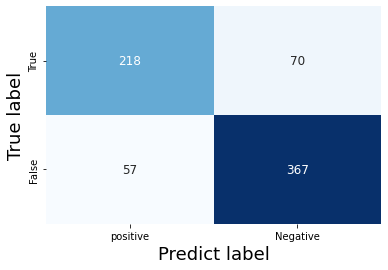

In [ ]:
from sklearn.metrics import confusion_matrix
proba_each_row = model.predict_proba(data)
thereshhold = 0.5
con_max = confusion_matrix(y_true=target, y_pred=proba_each_row[:,1] > thereshhold,labels=[1, 0]) 
sns.heatmap(con_max,xticklabels= ['positive','Negative'],yticklabels=['True','False'], annot=True, cbar=False,cmap='Blues',fmt='g',annot_kws={'size':12},)
plt.xlabel('Predict label',fontsize=18)
plt.ylabel('True label',fontsize=18)



In [ ]:
from sklearn.metrics import roc_curve
fpr_logistic,tpr_logistic,thresholds_logistic = roc_curve(target, proba_each_row[:,1])
roc
from sklearn.metrics import precision_recall_curve

pr_logistic,rc_logistic, pr_rc_thre_logistic = precision_recall_curve(y_true=target,probas_pred=proba_each_row[:,1])

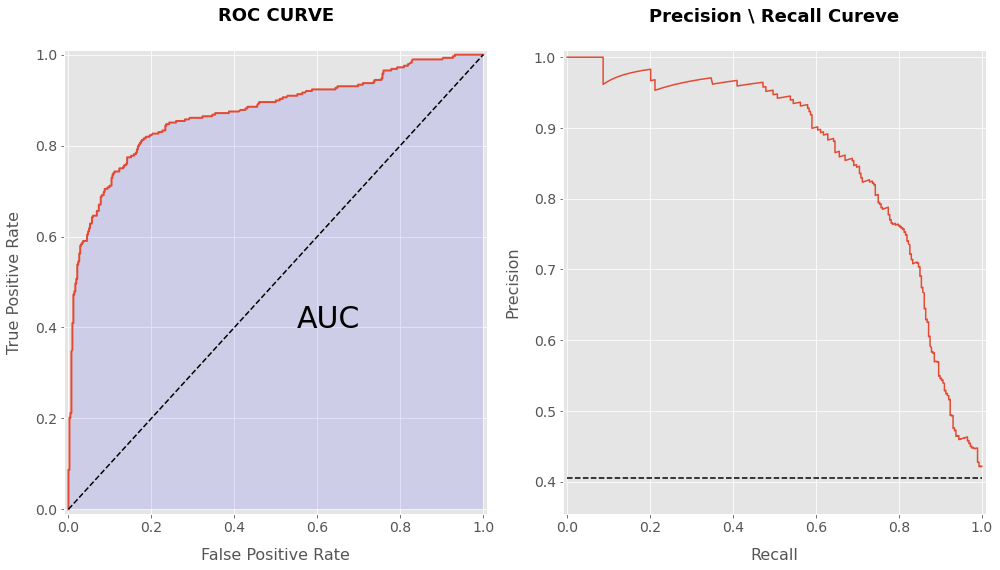

In [ ]:
#dot
# plt.plot([fpr_logistic[index],fpr_logistic[index]],[tpr_logistic[index],tpr_logistic[index]],'ro')
# # y 
# plt.plot([0,fpr_logistic[index]],[tpr_logistic[index],tpr_logistic[index]],'r--')
# # x 
# plt.plot([fpr_logistic[index],fpr_logistic[index]],[0,tpr_logistic[index]],'r--')

### 가장 가까운 값 찾기 => 전체행에 대해 원하는 값을 뺀다음 0에 가장 근접한 경우를 찾는다.
x= 0.2
difference_array = np.absolute(fpr_logistic-x)
index = difference_array.argmin()

plt.style.use('ggplot')
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.plot(fpr_logistic,tpr_logistic,linewidth=2)
plt.title('ROC CURVE',fontsize=18,fontweight="bold",y=1.05)
plt.xlabel('False Positive Rate',fontsize=16,labelpad=13,)
plt.ylabel('True Positive Rate',fontsize=16,labelpad=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot([0,1],[0,1],'k--')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.fill_between(fpr_logistic,tpr_logistic, facecolor='blue',alpha=0.1)
plt.text(0.55,0.4, 'AUC', fontsize=30)

base_rate = target.mean()
plt.subplot(122)
plt.plot(rc_logistic,pr_logistic)
plt.title('Precision \ Recall Cureve',fontsize=18,fontweight="bold",y=1.05)
plt.xlabel('Recall',fontsize=16,labelpad=13)
plt.ylabel('Precision',fontsize=16,labelpad=13,)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot([0,1],[base_rate,base_rate],'k--')
plt.xlim(-0.01,1.01)
plt.ylim(base_rate-0.05,1.01)


plt.tight_layout()

(0.3544943820224719, 1.01)

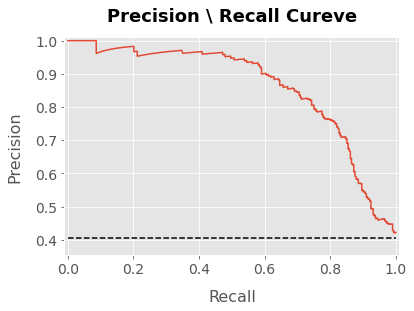

In [ ]:
from sklearn.metrics import auc



base_rate = target.mean()
# plt.subplot(122)
plt.plot(rc_logistic,pr_logistic)
plt.title('Precision \ Recall Cureve',fontsize=18,fontweight="bold",y=1.05)
plt.xlabel('Recall',fontsize=16,labelpad=13)
plt.ylabel('Precision',fontsize=16,labelpad=13,)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot([0,1],[base_rate,base_rate],'k--')
plt.xlim(-0.01,1.01)
plt.ylim(base_rate-0.05,1.01)
